## Network Science Lab 6

### Simulating the naive Network-SI model

In this lab, you will develop code to compute solutions to the naive network-SI model on a Barabasi-Albert graph. Running the cell below will generate the needed graph.

In [1]:
import networkx as nx
G = nx.barabasi_albert_graph(200,4,seed=1)
N = G.number_of_nodes()
print(G)

Graph with 200 nodes and 784 edges


The governing equations for the naive network-SI model are:

$$\frac{dx_i}{dt} =  \beta(1-x_i)\sum_{j=0}^{N-1} A_{ij} x_j, i=0,1,2,...,N-1.$$

The equations have been written with $x_i$ instead of $\left<x_i\right>$ for convenience.
The nodes are numbered from $0$ to $N-1$ which is why the sum is also from $0$ to $N-1$.
We will use the following initial condition: $x_0(t=0) = 0.001$, $x_i(t=0)=0$ for $i>0$.



1) Create a function named RHS which takes $t$, and $\textbf{x}$ as input and returns $d\textbf{x}/dt$. Note that $\textbf{x}$ and $d\textbf{x}/dt$ should each contain $N$ elements. We will use $\beta=0.2$.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
beta = 0.2 #This variable will be available within RHS below
#Add code here
A = nx.adjacency_matrix(G)
def RHS(t,x):
    dxdt = beta*(1-x)*(A.dot(x))
    return dxdt


2) Now, (a) set the variable, x0, to the initial condition, and  (b) create an array of times, t (starting at zero) at which the solution will be computed (x0 should contain $N$ elements).

In [5]:
#Add code here
x0 = np.zeros(N)
x0[0] = 0.001
t = np.linspace(0,5,1001)

3) Use solve_ivp with the BDF method to compute the solution to the naive network-SI model. Your solution should be stored in an $N \textrm{x} Nt+1$ element array (where $Nt+1$ is the size of t).

In [27]:
from scipy.integrate import solve_ivp
sol = solve_ivp(RHS,[t[0],t[-1]],x0,t_eval = t,method='BDF')
y = sol.y

4) Consider the node average, $\overline{x}(t) = \frac{1}{N}\sum_{i=1}^N x_i(t)$. Compute the node average and plot the node average vs. time.  

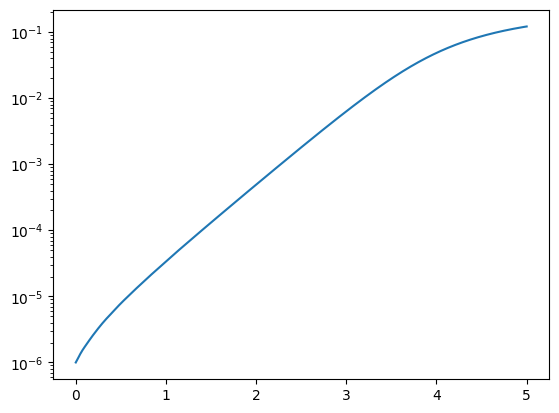

In [42]:
#Add code here
x = np.zeros(1001)
for i in range(0,1001):
    x[i] = sum(y[:,i])/1001
plt.semilogy(t,x)

5) The degree-based approximation predicts that the disease will initially spread exponentially with the foloowing trend: $exp(t/\tau)$ with $\tau^{-1}  = \beta\left(\overline{k^2}/\overline{k}-1 \right)$. Code has been provided below to compute $\tau$. 
Does your computed node average follow this trend? Make a plot comparing your numerical result and this theoretical estimate. Note that we are interested in the rate of increase and not the magnitude of the node average.

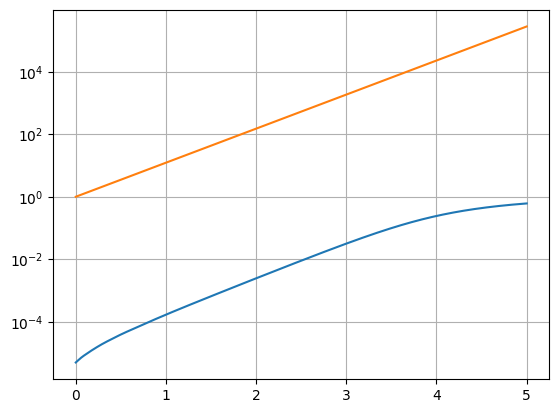

In [46]:
k = np.array(list(nx.degree(G)))[:,1]
kbar = k.mean()
k2bar = np.mean(k**2)
tau_inv = beta*(k2bar/kbar-1)
tau = 1/tau_inv

#f = 5*10**(-5)*np.exp(t/tau)
f = np.exp(t/tau)
plt.figure()
xbar = y.mean(axis=0)
plt.semilogy(t,xbar,label='simulation')
plt.semilogy(t,f,label='dba')
plt.grid()


6) We can also estimate the rate of spread construting a linear least-squares fit of the form $log(\overline{x}) = at + b$ where $a$ and $b$ are the fit parameters. In the cell below, select ind1 and ind2, and then the code will construct such a fit for xbar[ind1:ind2] (assuming you have stored the node average in a variable named xbar). Is $a$ close to $1/\tau$?

In [ ]:
#ind1 = ?
#ind2 = ?
a,b = np.polyfit(t[ind1:ind2],np.log(xbar[ind1:ind2]),1)
print("a=",a)

**Note on solve_ivp:** *solve_ivp* generates approximate numerical solutions for systems of ODEs using one of several available variable time step methods. The solutions are computed moving forward from the initial condition one time step at a time. Each iteration, the length of the time step is set so that an estimated error falls below a given threshold (smaller time steps tend to correspond to more accurate solutions). We can assume that all of the available methods have been implemented efficiently, and there is no one method that works best for all IVPs. For systems of nonlinear ODEs, the BDF method is usually a good choice.